In [134]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
def get_labels(language):
    train_filepath = "labeled_data/{}_train_4-14.csv".format(language)
    val_filepath = "labeled_data/{}_val_4-14.csv".format(language)
    test_filepath = "labeled_data/{}_test_4-14.csv".format(language)
    train_labels = pd.read_csv(train_filepath)["labels"]
    val_labels = pd.read_csv(val_filepath)["labels"]
    test_labels = pd.read_csv(test_filepath)["labels"]
    all_labels = np.concatenate([train_labels, val_labels, test_labels])
    all_labels = all_labels - 2
    print("mean: ", np.mean(all_labels))   
    return all_labels.tolist()

en_data = get_labels("english")
es_data = get_labels("spanish")
ja_data = get_labels("japanese")
zh_data = get_labels("chinese")


mean:  0.035146198830409266
mean:  0.05310873252617409
mean:  0.3320465578756506
mean:  -0.12321637426900592


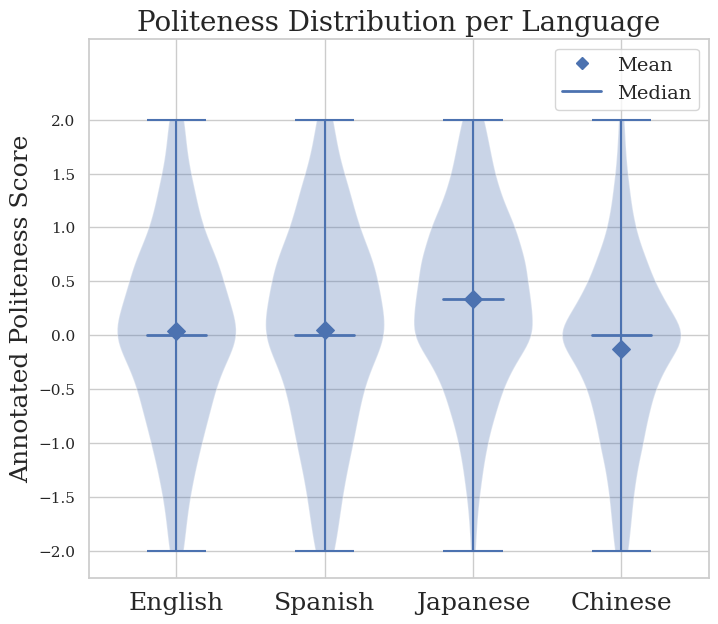

In [190]:
#make box and whisker plot using seaborn
plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(figsize=(8,7))
#represent median with line and mean with diamond
ax.violinplot([en_data, es_data, ja_data, zh_data], showextrema=True, widths=0.8, bw_method=0.25)
ax.xaxis.set_ticks([1, 2, 3, 4])
ax.set_xticklabels(["English", "Spanish", "Japanese", "Chinese"], fontsize=18)
ax.set_ylabel("Annotated Politeness Score", fontsize=18)
ax.set_title("Politeness Distribution per Language", fontsize=20)

#set y range
ax.set_ylim([-2.25, 2.75])
ax.set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])

#plot means and medians
medians = [np.median(en_data), np.median(es_data), np.median(ja_data), np.median(zh_data)]
means = [np.mean(en_data), np.mean(es_data), np.mean(ja_data), np.mean(zh_data)]
for i in range(4):
    ax.scatter(i+1, means[i], marker='D', color='b', s=80, zorder=2)
    ax.plot([i+1-0.2, i+1+0.2], [medians[i], medians[i]], color='b', linewidth=2, zorder=2)
ax.legend(labels=['Mean', 'Median'], 
          loc='upper right', 
          handles=[plt.Line2D([0], [0], color='b', marker='D', linestyle='None'), plt.Line2D([0], [0], color='b', linestyle='-', linewidth=2)],
          fontsize=14)
plt.show()